<a href="https://colab.research.google.com/github/AdityakumarSrivastwa/Expension-production-app-mern/blob/main/Ideal_low_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
from matplotlib import pyplot as plt

In [4]:
image = cv2.imread('/content/Image1.jpeg', 0)

**# Step 4: Convert to Frequency Domain**

In [5]:
 dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)


In [6]:
 dft_shift = np.fft.fftshift(dft)

**# Step 5: Create the Ideal Low-Pass Filter**

In [7]:
 rows, cols = image.shape

In [8]:
crow, ccol = rows // 2, cols // 2

In [9]:
mask = np.zeros((rows, cols, 2), np.uint8)

**# radius of the ideal low-pass filter**

In [10]:
r = 30

In [11]:
 center = [crow, ccol]

In [12]:
x, y = np.ogrid[:rows, :cols]

In [13]:
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r

In [14]:
mask[mask_area] = 1

**# Step 6: Apply the Filter**

In [15]:
 fshift = dft_shift * mask

** # Step 7: Inverse Transform**

In [16]:
f_ishift = np.fft.ifftshift(fshift)

In [17]:
img_back = cv2.idft(f_ishift)

In [18]:
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

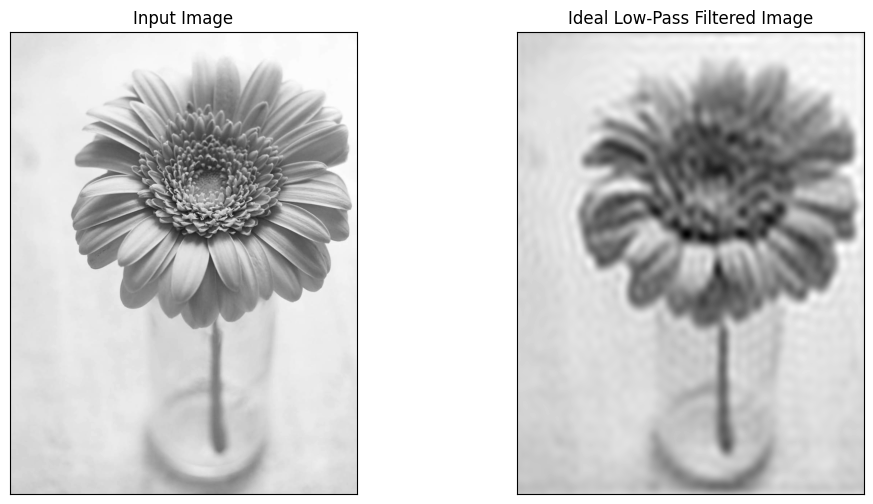

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Ideal Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()